In [2]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)
import tools4PytChem as t4p

/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/PytChem


**Start at:** Monday 20 February 2023, 13:51:23  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/PytChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

# "Python in the Physical Chemistry Lab (PPCL)" in a nutshell

<div class="rq">

This Python computer lab assumes a very basic knowledge of a programming language and algorithm development.

**To run the content of a Python cell:** click on a cell to select it. Then press SHIFT+ENTER on your keyboard, or press the play button in the top left corner of this window

<img src="MiscImages/ToolbarJupyterNotebook.svg" style="margin-left:auto; margin-right:auto; display: block; width:300px" id="img_TBJN" alt="Jupyter notebook toolbar"/>

<br>
If you click on a text cell by accident, you will see the so-called markdown coding of this cell (it is closely related to the HTML language). The corresponding formatted text/images/tables will be rendered by running the cell (SHIT-ENTER or play button).
<br>
<br>
    
**Ready?** Put down your mobile phone &#x1F4F5;, please, and let's enter into the Python realm. &#x1F451;&#x1F40D;&#x1F451;

</div>

## Simple calculations

### Basic mathematical operations

In [3]:
# Every line that starts with a # character is a comment

# addition
3 + 2 # it a also possible to add a comment after a command

5

In [4]:
#This is a new cell. It is possible to define several operations or commands in a cell
# multiplication
3*2

#division
7/2

3.5

In [5]:
# As you can understand, only the result of the last operation is shown in Jupyter notebooks' cells
# Let's use the print command to see the outcome of each operation
print(3*2)
print(7/2)

6
3.5


<div class="rq">

**It's not very convenient to print operations, isn't it?** &#x1F615; This '*last operation show-up*' is specific to Jupyter Notebooks.

There is actually a trick that consists in importing a so-called `InteractiveShell` and then to setup a config option
</div>

In [6]:
#these two lines can be added at the beginning of a Jupyter notebook if you find this behavior more convenient
# !! this configuration will be applied from the next executed cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
3*2
7/2

#Euclidean division - or division with remainder
7//2 #quotient
7%2  #remainder

#exponent
10**2
3**(3/2)
(3**3)**(1/2)

6

3.5

3

1

100

5.196152422706632

5.196152422706632

<div class="intro">

Now we want to use basic functions such as sine, cosine, logarithm, exponential, etc... Let's start first with the sine function, aka `sin`

</div>

In [8]:
sin(10)

NameError: name 'sin' is not defined

<div class="rq">

`name 'sin' is not defined` !!??
    
**What the hell! This basic calculator is crap &#x1F4A9;!!???** Not exactly. But we need to use a math library that knows all the usual math functions. To do this, we need to import the libraries at some point in the python code, before calling the function
    
There are two main mathematical libraries: `math` and `numpy`.
    
Let's compare them in the next Python cell

</div>

In [9]:
import math
import numpy as np #np is now a shortcut for numpy

#Hopefully, both functions will give the same values
math.sin(3.1416/2)
np.sin(3.1416/2)

# by the way, the pi number is not known by default, it must be called either from the math or numpy libraries
math.pi
np.pi

#let's now calculate the sine of pi. You can of course mix functions and variables from different libraries
math.sin(math.pi/2)
math.sin(np.pi/2)
np.sin(math.pi/2)
np.sin(np.pi/2)

0.9999999999932537

0.9999999999932537

3.141592653589793

3.141592653589793

1.0

1.0

1.0

1.0

<div class="rq">

**What is the best choice between `math` and `numpy`?** It depends. `math.sin` works on a single number, whilst the numpy version works on numpy arrays and is tremendously faster due to the benefits of vectorization. For the moment, this notion of arrays may seem obscure to you, but we will soon introduce them, together with lists.
    
All mathematical functions available in `numpy` are listed on [this webpage](https://numpy.org/doc/stable/reference/routines.math.html#), whereas those available in the `math` library are listed [here](https://docs.python.org/3/library/math.html). The `math` library is actually a module of the [Python Standard Library](https://docs.python.org/3/library/index.html#the-python-standard-library).

</div>

### Variables

<div class="intro">
They are useful if you want to store a number to use later in another calculation.
</div>

In [10]:
c = 2*3 #the result of the operation will not be displayed. You must use print to do so
print(c)

# Let's now use a variable to perform several celsius to kelvin conversions
C2K = 273.15 #Don't make a mistake here, or all your calculations will be wrong
C2K+25
C2K+150
C2K-10

6


298.15

423.15

263.15

<div class="rq">

An alternative would be to systematically type in the 273.15 conversion factor or copy and paste its value every time you need it. This is a bad idea. In such a situation it is strongly recommended to use variables

</div>

In [11]:
#let's use again the C2K conversion factor

c2K + 1047.3

NameError: name 'c2K' is not defined

<div class="rq">

what is actually illustrated here is that the `c2K` variable is unknown, as opposed to `C2K`. Yes, in Python **upper-case and lower-case letters are not the same**

</div>

In [12]:
C2K + 1047.3

1320.4499999999998

<div class="intro">

Let's now use variables to apply the Law of Mass Action to the calculation of equilibrium constants. We introduce it by using a general chemical reaction equation in which reactants A and B react to give products C and D:
    
*a*A + *b*B = *c*C + *d*C
    
The mass action law states that if the system is at equilibrium at a given temperature *T*, then the following ratio is a constant, the so-called equilibrium constant *K*.

$$\frac{[\mathrm{C}]_\mathrm{eq}^c [\mathrm{D}]_\mathrm{eq}^d}{[\mathrm{A}]_\mathrm{eq}^a [\mathrm{B}]_\mathrm{eq}^b}=K$$

Another useful quantity if the so-called Gibbs free energy change of the reaction, $\Delta_rG°$, that is directly related to the equilibrium constant by to the following equation:
    
$$\Delta_rG° = -RT \ln K(T)$$
    
where *R* is the ideal gas constant, which is exactly 8.31446261815324 J⋅K$^{-1}$⋅mol$^{-1}$
    
There are several interests in calculating $\Delta_rG°$, one of them being that its sign can be used to predict the ratio of products to reactants:
    
- if $\Delta_rG°$ < 0, then $K$ > 1 ⟺ products are favored over reactants at equilibrium
- if $\Delta_rG°$ > 0, then $K$ < 1 ⟺ reactants are favored over products at equilibrium
- if $\Delta_rG°$ $\sim$ 0, then $K$ $\sim$ 1 ⟺ the amount of products will be roughly equal to the amount of reactants at equilibrium

</div>

<br>
    
<div class="app">

The decomposition reaction of N$_2$O$_4$ to NO$_2$ can be summarized as N$_2$O$_4$ = 2NO$_2$.

Starting, at 25°C, from [N$_2$O$_4$]$_0$ = 0.0500 mol.L$^{-1}$, the N$_2$O$_4$ mixtures at equilibrium is found to be [N$_2$O$_4$]$_\mathrm{eq}$ = 0.0417 mol⋅L$^{-1}$ and [NO$_2$]$_\mathrm{eq}$ = 0.0165 mol.L$^{-1}$.

**1.** Calculate *K* at 25°C.

**2.** Then calculate $\Delta_rG°$ for this reaction (hint: the natural logarithm can be either calculated by the `np.log` or `math.log` functions).
</div>

In [13]:
#very basic (ugly) calculator way
# Question 1
0.0165**2/0.0417
# Question 2 (the values for R and for 0.0165**2/0.0417 are cut and pasted in the next line)
-8.31446261815324*298.15*np.log(0.0065287769784172665)

#basic algorithmic way
# Question 1
CP = 0.0165 #as concentration of product
CR = 0.0417 #as concentration of reactant
K = CP**2/CR
# Question 2
R = 8.31446261815324 # J K−1 mol−1
T = C2K + 25
DG = -R*T*math.log(K)
print(K, DG)

0.0065287769784172665

12472.9606592818

0.0065287769784172665 12472.9606592818


### Physical and mathematical constants

<div class="intro">

The "algorithmic" is obviously less straightforward than the "calculator" way. **Yet, such longer piece of code is to be preferred.**
- First, it is more readable. So if you save your notebook as a kind of well-organized calculation spreadsheet, you can later on use the same code and variables, or redo the same application
- Secondly, it can be generalized in terms of a function that could be used several times. This is the purpose of the following subsection, which consists of defining a function with *T* and *K* as arguments, that will return $\Delta_rG°$
    
But before that, it is time to introduce an interesting module that is worth to be known by physicists and chemists, the `constants` module of the SciPy library, where SciPy is is an open-source library for mathematics, science, and engineering. 

The list of constants is available [online](https://docs.scipy.org/doc/scipy/reference/constants.html). The code below illustrates how to call the module, and how to use the physical and mathematical constants.

</div>

In [14]:
import scipy.constants as sc
print(sc.value("molar gas constant"))
print(sc.unit("molar gas constant"))

print(sc.zero_Celsius) # it is not defined as a constant in SciPy, but with units

# the previous code becomes:
# Question 1
CP = 0.0165 #as concentration of product
CR = 0.0417 #as concentration of reactant
K = CP**2/CR
# Question 2
R = sc.value("molar gas constant") #the sc.unit("molar gas constant") command let us know that it is defined in the SI
C2K = sc.zero_Celsius
T = C2K + 25
DG = -R*T*math.log(K)
print(K, DG)

8.314462618
J mol^-1 K^-1
273.15
0.0065287769784172665 12472.96065905192


### Formatted printing and significant figures

<div class="intro">

As seen in the previous lines, we can easily print things to the screen. It is also possible to use "" and commas to print text, as done below:
    
</div>

In [15]:
print("K = ",K,"   DeltaG = ",DG)

K =  0.0065287769784172665    DeltaG =  12472.96065905192


<div class="intro">

The `print` command displays as many digits as Python's precision allows: floating point numbers are represented with a precision of up to 15 significant digits. So how can you manage significant figures? Well, it is recommended to store floating point numbers in variables with the highest precision of Python, and to print them with the desired precision.

To do so, we can specify how many significant figures we want overall, or we can specify how many significant figures we want after the decimal point. Let's start with the former, using the so-called f-string formatting of the `print` command. To specify a level of precision, we need to use a colon (:), followed by a decimal point, along with some integer representing the degree of precision. We place this inside the curly braces for an f-string, after the value we want to format.
    
What a loooooong explanation! &#x1F914; &#x1F635;&#x200D;&#x1F4AB; Let's move to the next Python cell to see that it's quite easy to understand and manage: 
    
</div>

In [16]:
print(f"K = {K:.4}  DeltaG = {DG:.4}")
print("This formatting operation actually performs rounding or converts a number in scientific notation, with the appropriate number of digits")

K = 0.006529  DeltaG = 1.247e+04
This formatting operation actually performs rounding or converts a number in scientific notation, with the appropriate number of digits


<div class="intro">
So how do we specify 4 decimal places? We just need to add an `f`, which means that we want our floatting point number displayed as a "fixed point number":
</div>

In [17]:
print(f"K = {K:.4f}  DeltaG = {DG:.4f}")

K = 0.0065  DeltaG = 12472.9607


## Lists and arrays

### Lists

<div class="intro">
    
A list is a data structure that's built into Python and holds a collection of items. Their main characteristics are:

- list items are enclosed in square brackets, like this: [item1, item2, item3]
- lists are ordered – *i.e.* the items in the list appear in a specific order. This enables us to use an index to access to any item
- it is possible to add or remove items after a list's creation
- Elements can be of different data types: you can combine strings, integers, and objects in the same list

Lists can be the preferred choice if you need to store a relatively short sequence of items and you don't plan to do any mathematical operations with it.

Let's first start with a list that contains only integers. It will also be shown how to add new items to a list and how to remove an item:
</div>

In [18]:
my_list = [3, 2, 10, 12, 3, 1]
print("my_list = ",my_list)
my_list.extend([6, 2, 8])
print("my_list extended = ",my_list)
del my_list[1]
print("my_list after deletion of item [1] = ",my_list)

my_list =  [3, 2, 10, 12, 3, 1]
my_list extended =  [3, 2, 10, 12, 3, 1, 6, 2, 8]
my_list after deletion of item [1] =  [3, 10, 12, 3, 1, 6, 2, 8]


<div class="rq">

It's actually the second item that has been deleted. **It's because the list index starts with 0 in Python**. So, the index value of the first item is 0, that of the second item is 1, etc...

</div>

### Arrays

<div class="intro">
    
An array is also a data structure that stores a collection of items. Like lists, arrays are enclosed in square brackets, they are ordered, and they can be modified

But the array's ability to store different data types is less obvious, it depends on the kind of array used.

To use arrays in Python, you need to import either an `array` module or the `NumPy` package, which is the fundamental package for numerical computing in Python. `NumPy` arrays support different data types. Let's give an example:
</div>

In [19]:
import numpy as np #np is now a shortcut for numpy

my_array = np.array([3, 2, 10, 12, 3, 1])
print("my_array = ",my_array) #you will see that items are not separated with commas
print("item 1 of my_array = ",my_array[1])
my_array = np.append(my_array,[55, 147, 309])
print("my_array = ",my_array)

my_array =  [ 3  2 10 12  3  1]
item 1 of my_array =  2
my_array =  [  3   2  10  12   3   1  55 147 309]


<div class="rq">

Arrays are great for numerical operations, whereas lists cannot directly handle math operations. **An important feature is that operations can simultaneously be applied to all array elements**. Let's illustrate this: 

</div>

In [20]:
array2 = 2*my_array - 1
print("array2 = ",array2)

array2 =  [  5   3  19  23   5   1 109 293 617]


In [21]:
my_array = np.array([3, 2, 10, 12, 3, 1, "Albert Einstein"])
print(my_array)
array2 = 2*my_array - 1

['3' '2' '10' '12' '3' '1' 'Albert Einstein']


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('int64'), dtype('<U21')) -> None

<div class="rq">

The last cell execution returned the following error. Why? It's because `my_array` contains both numbers (`int64` type, as integer) and strings (`<U21` type, as unicode). This `2*my_array` command generates an error, since it is not possible to do numerical applications on such hybrid arrays.


```Python
---------------------------------------------------------------------------
UFuncTypeError                            Traceback (most recent call last)
Input In [20], in <cell line: 3>()
      1 my_array = np.array([3, 2, 10, 12, 3, 1, "Albert Einstein"])
      2 print(my_array)
----> 3 array2 = 2*my_array - 1

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('int64'), dtype('<U21')) -> None
```

</div>

### How to easily read arrays from text files in Python?

<div class="intro">
    
Data files can be loaded into a Python code in several ways. We will concentrate here on the reading of data saved as columns under the so-called CSV format, using the `genfromtxt` function of the NumPy library. 

CSV stands for "comma-separated values". A CSV file is a delimited text file that uses a comma, or any other delimiter such a ; or TAB, etc... to separate values.
A CSV file consists of one or more lines which consists of one or more values separated by commas. In addition, all the lines of a CSV file have the same number of values.

Typically, you use a CSV file to store tabular data in plain text. The CSV file format is quite popular and supported by many software applications such as Microsoft Excel and Google Spreadsheet.read CSV files.
    
</div>

<br>
<div class="app">
    
Let's now have a look at the content of a file named `VolcanoPlot-woA.csv`, contained in the `MiscData/` folder. If you open it with an editor, or directly with this Jupyter tool, you will see
```
DGads;log i0
-12.876146;-6.5492228
-8.5595008;-6.7668394
-9.9983824;-5.7029361
-6.3089424;-5.1830743
-6.272048;-4.9775475
-7.4526688;-2.8013817
-3.3573904;-2.91019
-2.3243472;-3.4784111
-2.1029808;-2.5958549
0.6272048;-3.611399
1.8816144;-4.9654577
4.3904336;-5.2314335
10.441115;-6.3316062
11.806208;-7.5889465
17.008318;-7.4075993
```

The CSV file has a header row that includes the titles of each column. Each row in the file contains the same number of cells, which are separated by semicolons. 

You can also import it in a spreadsheet program, that will display:
<img src="MiscData/VolcanoPlot-SpreadSheet-woA.png" style="margin-left:auto; margin-right:auto; display: block; width:220px" id="img_VolcanoPlotData" alt="Volcano plot data for the hydrogen reaction"/>

**1.** Use the `genfromtxt` function of `numpy` to read the content of `MiscData/VolcanoPlot-woA.csv`. Don't forget to remove the first line, *i.e.* the header, and to setup the appropriate delimiter.

**2.** Use again `genfromtxt` function of `numpy` to read the content of `MiscData/VolcanoPlot-woA.csv`. Now setup the `unpack` option to `True`. If True, the returned array is transposed, so that each column may be returned using, for example `x, y, z = genfromtxt(...)` for a 3-column CSV datafile.
</div>

In [22]:
#Q1
data = np.genfromtxt("./MiscData/VolcanoPlot-woA.csv",delimiter=";",skip_header=1)
print(data)

[[-12.876146   -6.5492228]
 [ -8.5595008  -6.7668394]
 [ -9.9983824  -5.7029361]
 [ -6.3089424  -5.1830743]
 [ -6.272048   -4.9775475]
 [ -7.4526688  -2.8013817]
 [ -3.3573904  -2.91019  ]
 [ -2.3243472  -3.4784111]
 [ -2.1029808  -2.5958549]
 [  0.6272048  -3.611399 ]
 [  1.8816144  -4.9654577]
 [  4.3904336  -5.2314335]
 [ 10.441115   -6.3316062]
 [ 11.806208   -7.5889465]
 [ 17.008318   -7.4075993]]


In [23]:
#Q2
DG, logi0 = np.genfromtxt("./MiscData/VolcanoPlot-woA.csv", delimiter=";", skip_header=1, unpack=True)
print("DeltaG = ",DG)
print("log(i0) = ",logi0)

DeltaG =  [-12.876146   -8.5595008  -9.9983824  -6.3089424  -6.272048   -7.4526688
  -3.3573904  -2.3243472  -2.1029808   0.6272048   1.8816144   4.3904336
  10.441115   11.806208   17.008318 ]
log(i0) =  [-6.5492228 -6.7668394 -5.7029361 -5.1830743 -4.9775475 -2.8013817
 -2.91019   -3.4784111 -2.5958549 -3.611399  -4.9654577 -5.2314335
 -6.3316062 -7.5889465 -7.4075993]


## Functions and plotting, with a word about indentation

**Do you want to plot a function?** Then you need to know how to define it. Among other applications


### Definition of a function

<div class="intro">

A function is a piece of code that we want to use multiple times but don't want to write out each time. This typically involves taking some input, manipulating the input and returning an output. It only runs when it is called. In Python a function is defined using the `def` keyword:
```Python
def my_function1(message):
  print(message)
```

To call a function, use the function name followed by parenthesis. Arguments are specified inside the parentheses. You can add as many arguments as you want, just separate them with a comma.

```Python
my_function1("Hello from a function")
```

This call will simply return `My message is:  Hello from a function`.

Let's implement it:
</div>

In [24]:
def my_function1(message):
    print("My message is: ",message)
print("This is outside the function")
my_function1("Hello from a function")

This is outside the function
My message is:  Hello from a function


<div class="rq">

The `print("My message is: ",message)` statement belongs to an **indented block**, consisting in this case of one statement. The indentation tells Python which statements are in the function, and which are outside it.

In the main block of the previous cell, you first print  `This is outside the function` and then you call  `my_function1`, that has been previously defined at the beginning of this cell.
</div>

To let a function return a value, use the return statement:

```
def my_function2(a,b,x):
  return a*x+b
```

For example, the call `my_function2(2,1,3)` will return `7`.

You can either print it (`print(my_function2(2,1,3))`) or store it in a variable (`y = my_function2(2,1,3)`).

In [25]:
def my_function2(a,b,x):
  return a*x+b
y = my_function2(2,1,3)
print(y)

7


<div class="app">

We are now going to define a function that will return the standard change in free energy of a reaction, $\Delta_rG°$, as a function of the equilibrium constant (*K*) and the temperature (*T*):
$$\Delta_rG° = -RT \ln K(T)$$

The function will start with a docstring section. They are documentation strings that are used as comments and they are added below a function or module to describe what it does.
</div>

In [26]:
def DrG(K,t):
    # this is a docstring
    """
    This function returns the standard change in free energy of a reaction, ΔrG°
    
    input:
        - K = equilibrium constant
        - t = temperature in Celsius
    output:
        - ΔrG° in J K-1 mol-1
    prints/saves: nothing
    """ #end of the docstring
    import numpy as np
    import scipy.constants as sc
    R = sc.value("molar gas constant") #the sc.unit("molar gas constant") command previously applied let us know that it is defined in the SI
    C2K = sc.zero_Celsius
    T = C2K + t
    return -R*T*np.log(K)

CP = 0.0165 #as concentration of product
CR = 0.0417 #as concentration of reactant
K = CP**2/CR
print(f"K = {K:.4}  DeltaG = {DrG(K,25):.4}")

K = 0.006529  DeltaG = 1.247e+04


<div class="rq">
    
<span style="color:red">**Why a docstring section?**</span> **<u>It's part of a good practice</u>** &#x1F44C;
    
There is no obligation. But let's suppose that you have stored the previous `DrG` function in an external python library. You do not remember how `DrG` exactly works and which arguments it needs. Probably an equilibrium constant and a temperature, but in which order? Must the temperature be given in Celsius or directly in Kelvin? Whats is the unit of the returned DrG value? Such answers can be obtained thanks to a well-written `docstring` section:
- it helps users to properly address a function
- it also helps the main coder remember the function of any code after a long time
- it also helps other coders who want to work on the same project
- **could it be relevant in the Physical Chemistry lab?** Of course. First of all for the main developer, that is you. But let's also assume that you **develop a collaborative lab notebook** in the framework of a **lab project**. An accurate and concise `docstring` section will be of utmost importance to make the notebook and its functions usable and improvable by all group members.

As a user, you just have to type `help(method)` in order to know how to use it:
</div>

In [27]:
help(DrG)

Help on function DrG in module __main__:

DrG(K, t)
    This function returns the standard change in free energy of a reaction, ΔrG°
    
    input:
        - K = equilibrium constant
        - t = temperature in Celsius
    output:
        - ΔrG° in J K-1 mol-1
    prints/saves: nothing



<div class="app">

**1.** Define an array `K` with the following equilibrium constants values: 0.05, 0.1, 0.5, 1, 5, 10, 30, 50, 100, 500, 1000

**2.** Use the previously defined `DrG` function to calculate all corresponding $\Delta_rG°$ at once
    
</div>

In [28]:
import numpy as np #np is now a shortcut for numpy

K = [0.05, 0.1, 0.5, 1, 5, 10, 30, 50, 100, 500, 1000] # we first define a list with various values of the equilibrium constant
K = np.array(K) # the list is converted into a numpy array
print(DrG(K,25)) # DG returns an array 

[  7426.2915782    5708.00950243   1718.28207577     -0.
  -3989.72742666  -5708.00950243  -8431.42215818  -9697.73692909
 -11416.01900486 -15405.74643152 -17124.02850729]


### Plotting

<div class="intro">
    
There are no plotting functions in the Python Standard Library Python, so we have to import a module for this task. The most widely used one is the `pyplot` module of the [Matplotlib library](https://matplotlib.org/stable/tutorials/introductory/quick_start.html), which is a widely used and useful plotting library. Simple plots are then easy to create and customize. 
</div>
<br>
<div class="app">


Let's start by plotting $\Delta_rG°(25)$ as a function of *K*
</div>

Text(0.5, 0, 'equilibrium constant K')

Text(0, 0.5, 'Gibbs free energy')

Text(0.5, 1.0, 'My first graph: DrG° as a function of K, at 25°C')

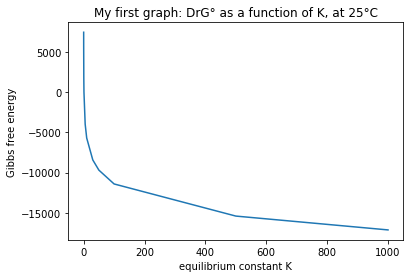

In [29]:
# import the required module
import matplotlib.pyplot as plt

# plotting the points 
plt.plot(K, DrG(K,25))
  
# naming the x axis
plt.xlabel('equilibrium constant K')

# naming the y axis
plt.ylabel('Gibbs free energy')
  
# giving a title to my graph
plt.title('My first graph: DrG° as a function of K, at 25°C')
  
# function to show the plot
plt.show()

In [30]:
#set the interactivity parameter to 'none'. Function calls will display nothing from now on
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

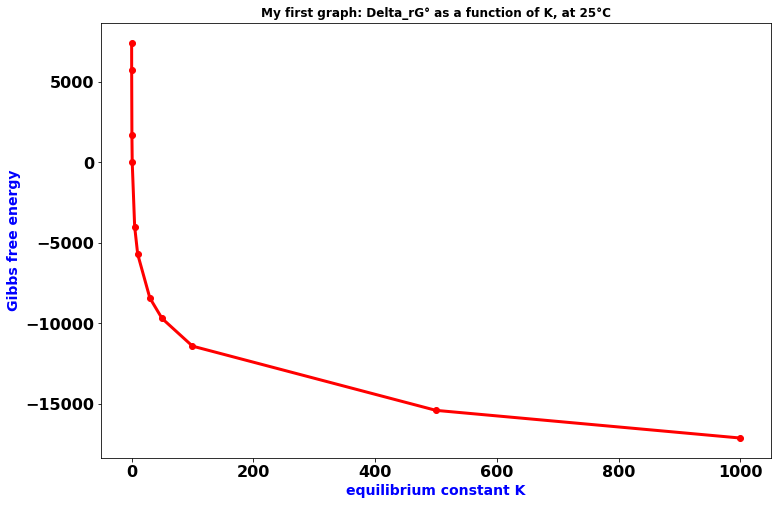

In [31]:
#this sets the figure size
plt.figure(figsize=(12,8))

# plot the points 
plt.plot(K, DrG(K,25), color='r', linewidth=3, marker="o")

# name the x and y axis
plt.xlabel('equilibrium constant K',size=14,fontweight='bold',color='blue')
plt.ylabel('Gibbs free energy',size=14,fontweight='bold',color='blue')
# set tick labels font size
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
# give a title to the graph
plt.title('My first graph: Delta_rG° as a function of K, at 25°C',fontweight='bold')

# it is also possible to save a plot, if you want to insert it in a document (text, presentation, ...)
plt.savefig('./FiguresCreatedInNotebooks/fig1-Pyt4PC.png',dpi=300,transparent=True)

# show the plot. The image is then closed and freed from memory. This is why plt.savefig or any other option must be called before plt.show
plt.show()


<div class="app">

Let's now work again on the `VolcanoPlot-woA.csv` datafile, contained in the `MiscData/` folder. According to its header, this file contains a first column named DGads and a second one named log i0. Explaining in details what these properties are would be far beyond the scope of this notebook. Let's just say that what is reported here is related to the electrocatalytic production of molecular hydrogen at a metal electrode. The $\log(i_0)$ property is the exchange current density, it is related the quantity of hydrogen produced. DGads is the so-called Gibbs energy of adsorption of hydrogen at the electrode, $\Delta_\mathrm{ads}G°$. Each ($\Delta_\mathrm{ads}G°$, $\log(i_0)$) couple characterizes the efficiency of a specific metal electrode. The plot is expected to look like a **Sabatier-like volcano**, with the best electrode materials on the peak. Well. It's time to bring this digression to an end.
    
</div>

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

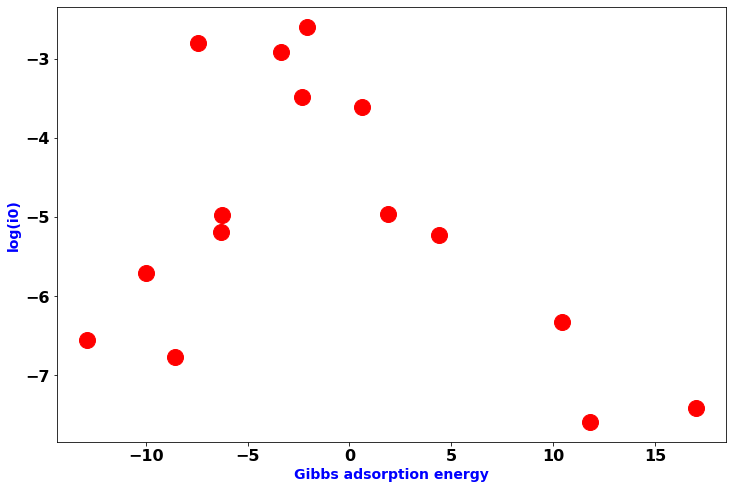

In [33]:
# import the required module
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(DG, logi0, color='r', linestyle='', marker="o",markersize=16)
plt.xlabel('Gibbs adsorption energy',size=14,fontweight='bold',color='blue')
plt.ylabel('log(i0)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.show()

<div class="rq">

**Hey!** It barely looks as a volcano &#x1F30B;! &#x1F914;
    
</div>
<br>
<div class="intro">

Well, the volcano plot is a somewhat idealized concept, not to mention the experimental uncertainties on $\Delta_\mathrm{ads}G°$ and $\log(i_0)$. To highlight the volcano shape of these data, we need to **smooth** them. The idea is to create an approximating function that attempts to capture important patterns in the data, while leaving out noise. We will use for that the Savitzky–Golay digital filter available in a library called **SciPy**. This library provides fundamental algorithms for scientific computing in Python. One of its modules, `scipy.signal` is a signal processing toolbox that currently contains some filtering functions. The Savitzky–Golay digital filter, `savgol_filter`, is part of the `scipy.signal` toolbox.
    
</div>
<br>
<div class="app">

Compare the next cell with the previous one to find the differences between them.
</div>

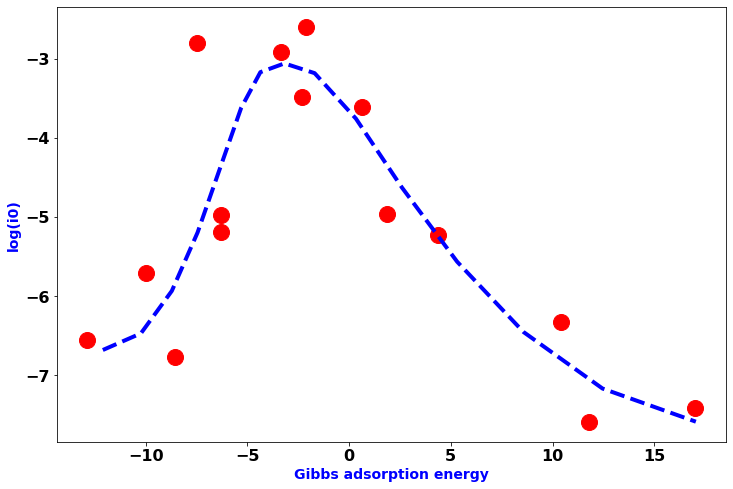

In [34]:
from scipy.signal import savgol_filter
DGhat, logi0hat = savgol_filter((DG,logi0), 11, 3)  # These two parameters are the length of the filter window,
                                                    # Followed by the order of the polynomial used to fit the samples
                                                    # We have played a bit to find a combination of parameters that nicely smooths the data

plt.figure(figsize=(12,8))
plt.plot(DG, logi0, color='r', linestyle='', marker="o",markersize=16) # plot of the experimental (DG, logi0) couple 
plt.plot(DGhat, logi0hat, color='b', linestyle='--', linewidth=4)  # plot of the smoothed data, displayed as a dashed line
plt.xlabel('Gibbs adsorption energy',size=14,fontweight='bold',color='blue')
plt.ylabel('log(i0)',size=14,fontweight='bold',color='blue')
plt.ylabel('log(i0)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.show()

<div class="rq">

The volcano shape of the ($\Delta_\mathrm{ads}G°$, $\log(i_0)$) data is somewhat more convincing now, isn't it? &#x1F4AA;
    
**Take-home message**: there is probably a method or function somewhere in a general python library that meets your needs and that is worth using instead of developing your own code. Just ask your favorite search engine... And try to find a simple tutorial, not a one written ~~by a nerd~~ by a pythonic programmer &#x1F913;. At least not in the first place.
    
</div>

## Model fitting
### The linear regression case

<div class="intro">
    
Regression is a basic and commonly used type of predictive analysis, that can be applied to various areas in business and academic studies. It predicts the value of unknown data by using another related and known data value. **Linear** regression mathematically models the unknown (or dependent) variable and the known (or independent) variable as a linear equation.

In this context, a lot of chemical analysis relies on our ability to fit a line as close as possible to a whole dataset. If necessary and if possible, an equation, hereafter called the model, is linearized. This the case of the Arrhenius equation, widely used in chemical kinetics:
$$k=A\exp(-E_a/RT)$$

where, *k* is the rate constant at temperature *T*, *A* is the pre-exponential factor, and *R* is the ideal gas constant. $E_a$ is the minimum energy molecules must possess in order to react to form a product. The following table contains *k* values experimentally measured at various temperatures *T*.
    
| Experiment | *T* / K | *k* / s$^{-1}$ |
| :---------------: |:---------------:| :---------------:|
|A|283|0.13|
|B|293|0.29|
|C|308|0.45|
|D|318|0.70|

Given the Arrhenius equation, there is an exponential relationship between *k* and *T*, and fitting the model with the data will give access to two kinetic values specific of the underlying reaction mechanism: *A* and $E_a$.

The model can be easily transformed into a linear equation by considering its logarithm:

$$\ln (k) = -E_a/RT + \ln (A) $$

The plot of $\ln (k)$ as a function of $\frac{1}{RT}$ is expected to be a line, $-E_a$ being its slope and $\ln (A)$ its *y*-intercept.

</div>
<br>
<div class="rq">

**Do not make a confusion between smoothing and model fitting**. Let's adapt what is said in [Wikipedia](https://en.wikipedia.org/wiki/Smoothing) on this topic: curve fitting often involves the use of an **explicit function form** for the result, whereas the immediate results from smoothing are the "smoothed" values with no final explicit functional form
</div>

<div class="app">

Linear regression is illustrated in the next python cell, using the `linregress` method of the `stats` module of the `scipy` library. Accordinf to the [online manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), `linregress` returns the slope, the intercept, and the *R*-value, which square  is equal to the coefficient of determination $R^2$.

**1.** Define two arrays, `Texp` and `kexp`, with the experimental data measured in experiments A-D.
    
**2.** Plot $\ln(k_\mathrm{exp})$ as a function of $\frac{1}{RT_\mathrm{exp}}$. Yet, the experimental uncertainty involves that the 4 couples are not perfectly aligned. Plot $\ln(k_\mathrm{exp})$ as a function of $\frac{1}{RT_\mathrm{exp}}$ using markers only, *i.e.* do not connect data with lines.
</div>

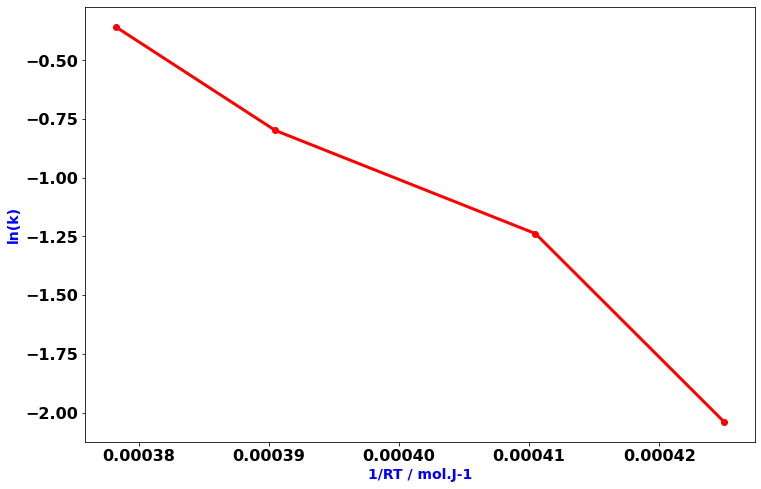

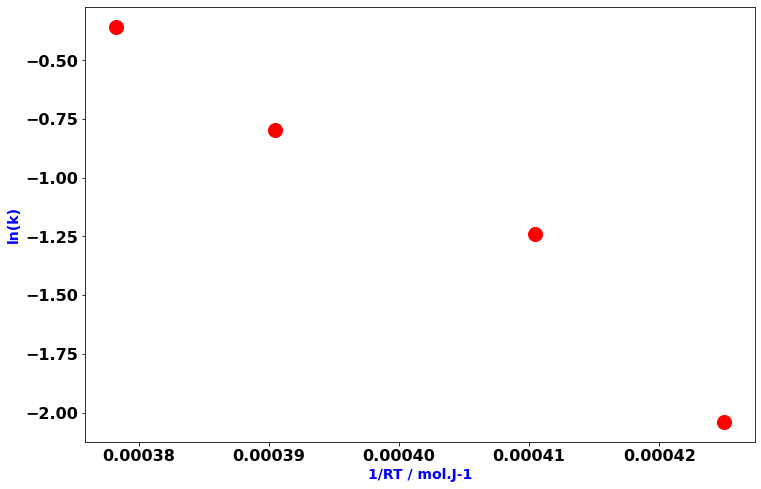

In [35]:
import numpy as np
#Q1
Texp = np.array([283,293,308,318])
kexp = np.array([0.13,0.29,0.45,0.70])

#Q2
import scipy.constants as sc
R = sc.value("molar gas constant")
RTinv = 1/(R*Texp)
lnk = np.log(kexp)

import matplotlib.pyplot as plt
#this sets the figure size
plt.figure(figsize=(12,8))

# plot the points 
plt.plot(RTinv, lnk, color='r', linewidth=3, marker="o")

# name the x and y axis
plt.xlabel('1/RT / mol.J-1',size=14,fontweight='bold',color='blue')
plt.ylabel('ln(k)',size=14,fontweight='bold',color='blue')
# set tick labels font size
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.show()

# The experimental uncertainty involves that the 4 couples are not perfectly aligned
# Let's redo the plot with only markers and no connecting line
plt.figure(figsize=(12,8))
plt.plot(RTinv, lnk, color='r', linestyle='', marker="o", markersize=14)
plt.xlabel('1/RT / mol.J-1',size=14,fontweight='bold',color='blue')
plt.ylabel('ln(k)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.show()
#that's better. Now it's time to fit the data

<div class="app">

**3.** Use the `linregress` function of `scipy.stats` to find $E_a$ and $\ln (A)$. Evaluate the performance of this regression model with the coefficient of determination, $R^2$ (R-squared). The closer to 1 the R-squared value is, the better the model is.

**4.** $R^2$ tells how well the values fit compared to the original values. But the best way to evaluate the quality of the fit and the actual linear behavior of the data is to plot the couples of data and the fitted line on the same graph. To do that:
- first define a function `kArr` (Arr as Arrhenius) that will take the temperature $T$ and the fitted $A$ and $E_a$ parameters as arguments
- do a scatter plot $\ln(k_\mathrm{exp})$ as a function of $\frac{1}{RT_\mathrm{exp}}$, *i.e.* using the option `linestyle=''`
- superimpose on the same graph the plot of `np.log(kArr(Texp,A,Ea))` as a function of $\frac{1}{RT_\mathrm{exp}}$

**5.** Use the fitted linear model to predict the value of the rate constant *k* at *T* = 300K and at *T* = 373.15K.
</div>

In [36]:
#Q3
from scipy.stats import linregress

fitlin = linregress(x=RTinv, y=lnk)

Ea = -fitlin.slope
lnA = fitlin.intercept #lnA is a variable!!
A = np.exp(lnA)
Rscore = fitlin.rvalue

print(f"Ea  = {Ea:8.3f} J.mol-1\nA   = {A:8.3f} s-1\nR^2 = {Rscore**2:6.3f}") # \n = new line

Ea  = 33950.020 J.mol-1
A   = 270281.181 s-1
R^2 =  0.965


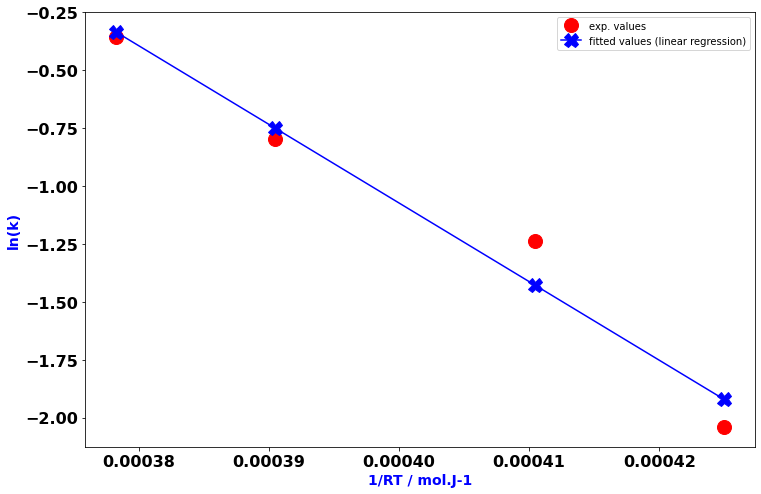

k = 0.332 at 300K
k = 4.781 at 373.15K


In [37]:
#Q4

def kArr(T,A,Ea):
    """
    input:
        - T = temperarture, in K
        - A = pre-exponental factor
        - Ea = activation energy, in J.mol-1
    returns:
        the rate constant, k, in the same unit as A
    """
    import numpy as np
    import scipy.constants as sc
    R = sc.value("molar gas constant")
    return A*np.exp(-Ea/(R*T))

kfit = kArr(Texp,A,Ea)
plt.figure(figsize=(12,8))
plt.plot(RTinv, np.log(kexp), color='r', linestyle='', marker="o", markersize=14, label="exp. values")
plt.plot(RTinv, np.log(kfit), color='b', linestyle='-', marker="X", markersize=14, label="fitted values (linear regression)")
plt.xlabel('1/RT / mol.J-1',size=14,fontweight='bold',color='blue')
plt.ylabel('ln(k)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend()
plt.show()

#Q5

k300 = kArr(300,A,Ea)
k373 = kArr(373.15,A,Ea)
print(f"k = {k300:.3f} at 300K")
print(f"k = {k373:.3f} at 373.15K")

<div class="rq">

Given that the temperature domain of the experimental data couples is [283-318]K, the 300K value for *k* is an interpolated value, whilst the 373.15K value for *k* is extrapolated.

</div>
<br>

<div class="app">

**5.** Plot again the [$\frac{1}{RT_\mathrm{exp}}$, $\ln(k_\mathrm{exp})$] couples on a graph as well as the [$\frac{1}{RT_\mathrm{exp}}$, $\ln(k_\mathrm{Arr})$] couples.
<br>
But this time, plot the line in the [273.15, 400]K domain in order to highlight that the $k_\mathrm{Arr}$ model applies beyond the [283-318]K domain. It is suggested to use the `np.linspace` function. The `numpy` manual says that:

`np.linspace(start, stop, n)` returns *n* evenly spaced samples, calculated over the interval [*start*, *stop*]

</div>

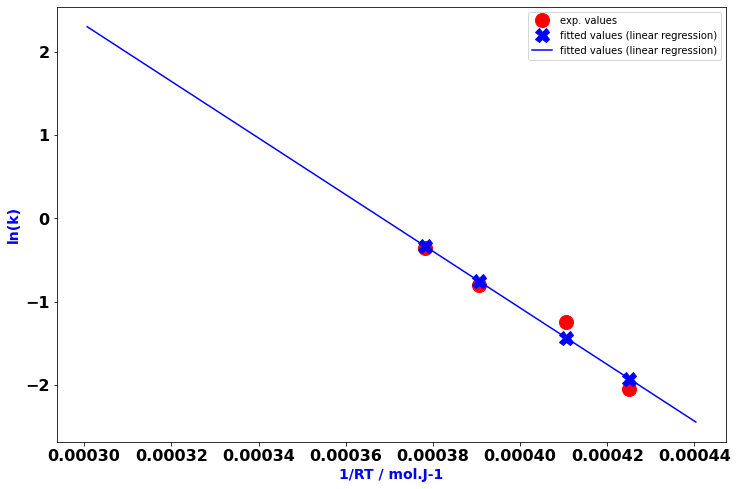

In [38]:
#Q5
T_extrap = np.array([273.15, 400]) #Two values is enough for a line, isn't it?
kfit_extrap = kArr(T_extrap,A,Ea) # a new kfit_extrap array is created, with k calculated for each temperature. Again, this is a strong advantage of the numpy library
RTinv_extrap = 1/(R*T_extrap) # ln(k) will be plotted as a function of 1/RT (ln(k) = -E_a/RT + ln(A))

plt.figure(figsize=(12,8))
plt.plot(RTinv, np.log(kexp), color='r', linestyle='', marker="o", markersize=14, label="exp. values")
plt.plot(RTinv, np.log(kfit), color='b', linestyle='', marker="X", markersize=14, label="fitted values (linear regression)")
plt.plot(RTinv_extrap, np.log(kfit_extrap), color='b', linestyle='-', marker="", markersize=14, label="fitted values (linear regression)")
plt.xlabel('1/RT / mol.J-1',size=14,fontweight='bold',color='blue')
plt.ylabel('ln(k)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend()
plt.show()

### Non-linear models

<div class="intro">

Nonlinear regression is a form of regression analysis in which data *y* are modeled by a function which is a nonlinear combination of the model parameters *a*, *b*, ...and depends on at least one variable *x*:
$$y=f(x,\alpha)$$
where $\alpha=a,b,c,...$
    
The log transformation of $k=A\exp(-E_a/RT)$ allowed a linear model to fit experimental data that are otherwise possible only with nonlinear regression.
    
Nonlinear regression is a very powerful alternative to linear regression. It provides more flexibility in fitting curves because you can **define your own model**, in conjuction with an optimizer. The SciPy `optimize` includes solvers for several tasks, including curve fitting. It can be done with the `curve_fit` method. It takes several arguments as input - the name of the model function $f(x,\alpha)$ and then two arrays, one for *x* and the second for *y*, and it returns the optimal values for the $\alpha$ parameters, *i.e.* parameters that makes the $f(x,\alpha)$ model as close as possible to all experimental couples $(x_i,y_i)$.

It will also return a `pcov` 2D-array, that contains information about the accuracy of the fitting process, see the [online manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Using and analyzing `pcov` is beyond the scope of the present notebook.
</div>

<div class="app">

**1.** Define a function `kArr` that will return the rate constant calculated after the Arrhenius equation. It will take three arguments: a temperature `T` (in K), the pre-exponential factor `A` and the activation energy, `Ea` (in J/mol). Use the molar gas constant, *R*, of the `scipy.constants` module.
    
**2.** Use again the two previously defined `Texp` and `kexp` arrays, *i.e.* with the experimental data measured in experiments A-D. Directly search for the fitted parameters of the Arrhenius function. Name them `ANL` and `EaNL` - NL as non linear - to distinguish them from from those obtained by linear regression. Compare `ANL` and `EaNL` with the parameters `A` and `Ea` optimized by linear regression. 
    
**3.** Do a scatter plot of $k_\mathrm{exp}$ as a function of $RT_\mathrm{exp}$, *i.e.* using the option `linestyle=''`. Superimpose on the same graph the plot of `kArr(Texp,A,Ea)` and of `kArr(Texp,ANL,EaNL)` as a function of $\frac{1}{RT_\mathrm{exp}}$
</div>

A and Ea obtained by linear regression
Ea  = 33950.020 J.mol-1
A   = 270281.181 s-1
A and Ea obtained by non linear regression
Ea  = 31670.685 J.mol-1
A   = 110564.716 s-1


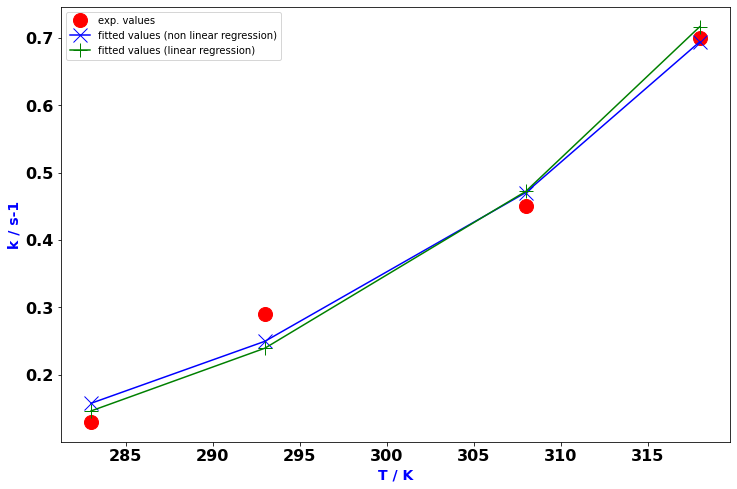

In [ ]:
import numpy as np
#Q1
def kArr(T,A,Ea):
    """
    input:
        - T = temperature, in K
        - A = pre-exponental factor
        - Ea = activation energy, in J.mol-1
    returns:
        the rate constant, k, in the same unit as A
    """
    import numpy as np
    import scipy.constants as sc
    R = sc.value("molar gas constant")
    return A*np.exp(-Ea/(R*T))

#Q2
from scipy.optimize import curve_fit
fitexp, fitcov = curve_fit(kArr, Texp, kexp)
ANL = fitexp[0]
EaNL = fitexp[1]

kfit2 = kArr(Texp,ANL,EaNL)

print("A and Ea obtained by linear regression")
print(f"Ea  = {Ea:8.3f} J.mol-1\nA   = {A:8.3f} s-1") # \n = new line
print("A and Ea obtained by non linear regression")
print(f"Ea  = {EaNL:8.3f} J.mol-1\nA   = {ANL:8.3f} s-1")

#Q3
plt.figure(figsize=(12,8))
plt.plot(Texp, kexp, color='r', linestyle='', marker="o", markersize=14, label="exp. values")
plt.plot(Texp, kfit2, color='b', linestyle='-', marker="x", markersize=14, label="fitted values (non linear regression)")
plt.plot(Texp, kfit, color='g', linestyle='-', marker="+", markersize=14, label="fitted values (linear regression)")
plt.xlabel('T / K',size=14,fontweight='bold',color='blue')
plt.ylabel('k / s-1',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend()
plt.show()

<div class="rq">
    
**This is a plot of the segments between the four pairs of experimental data, it does not look like an exponential function!** 

Yes. This is what the `plot` method of `matplotlib.pyplot` does. It draws a line from point to point.

You want to improve the plot, *i.e.* to draw an actual "smoother" exponential function? You just have to define a denser grid of points.

<div>

<div class="app">
    
**4.** Use `np.linspace` to define 100 temperatures between T(exp A) - 10K and T(exp D) + 10K. It is suggested to name the array `Tdense`

**5.** Calculate the corresponding Arrhenius constants, `kfitL` and `kfitNL`, using `A` and `Ea` and then `ANL` and `EaNL`, respectively.
    
**6.** Plot on the same graph:

- a scatter plot of $k_\mathrm{exp}$ as a function of $RT_\mathrm{exp}$, *i.e.* using the option `linestyle=''`
- a standard plot of `kfitL` as a function of `Tdense`
- a standard plot of `kfitNL` as a function of `Tdense`

Don't forget to add a legend.

</div>

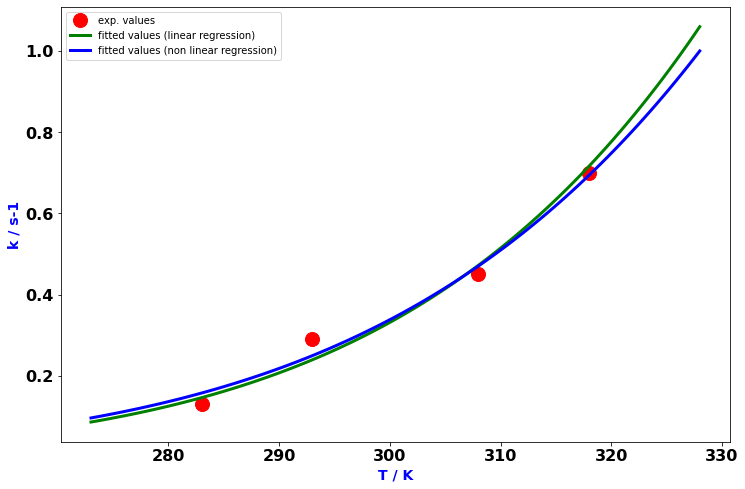

In [ ]:
#Q4
Tdense = np.linspace(Texp[0]-10,Texp[-1]+10,100)

#Q5
kfitL = kArr(Tdense,A,Ea)
kfitNL = kArr(Tdense,ANL,EaNL)

#Q6
plt.figure(figsize=(12,8))
plt.plot(Texp, kexp, color='r', linestyle='', marker="o", markersize=14, label="exp. values")
plt.plot(Tdense, kfitL, color='g', linestyle='-', linewidth=3, marker="", label="fitted values (linear regression)")
plt.plot(Tdense, kfitNL, color='b', linestyle='-', linewidth=3, marker="", label="fitted values (non linear regression)")
plt.xlabel('T / K',size=14,fontweight='bold',color='blue')
plt.ylabel('k / s-1',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend()
plt.show()

<div class="rq">
    
Even though the optimized parameters differ, the resulting plots are very close. Evaluating the best fit is beyond the scope of this notebook.

<div>

## Numerical integrals and derivatives

### Definite integrals

<div class="intro">

Is it necessary to recall that "*definite integrals can be interpreted as the signed area of the region in the plane that is bounded by the graph of a given function between two points in the real line. Conventionally, areas above the horizontal axis of the plane are positive while areas below are negative*" ([Wikipedia](https://en.wikipedia.org/wiki/Integral)).
    
We will now consider an integration process from a pragmatic point of view, *i.e.* the calculation of an area under a curve. We will use the `integrate` sub-package of `SciPy`, that provides several integration techniques. Methods for integrating functions include `trapezoid` ([trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) to compute integral) and `simpson` (uses [Simpson's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) to compute integral from samples).
    
In the following, the `simpson` method will be used to numerically integrate functions *f(x)*, *i.e* to compute integral from samples. In other words, the functions are not defined by an equation, such as $f(x)=x^2$, but by data. The function will first be plotted, and the area under the curve will be highlighted using the `fill_between` functionality of `matplotlib`. The area will then be calculated and printed. The plot is of course optional, `simpson` does not need it. But never trust algorithms... or the way you call them. A preliminary plot is recommended to qualitatively check the relevance of the definite integral you just computed. 

</div>

In [ ]:
from scipy.integrate import simpson
help(simpson)

Help on function simpson in module scipy.integrate._quadrature:

simpson(y, x=None, dx=1.0, axis=-1, even='avg')
    Integrate y(x) using samples along the given axis and the composite
    Simpson's rule. If x is None, spacing of dx is assumed.
    
    If there are an even number of samples, N, then there are an odd
    number of intervals (N-1), but Simpson's rule requires an even number
    of intervals. The parameter 'even' controls how this is handled.
    
    Parameters
    ----------
    y : array_like
        Array to be integrated.
    x : array_like, optional
        If given, the points at which `y` is sampled.
    dx : float, optional
        Spacing of integration points along axis of `x`. Only used when
        `x` is None. Default is 1.
    axis : int, optional
        Axis along which to integrate. Default is the last axis.
    even : str {'avg', 'first', 'last'}, optional
        'avg' : Average two results:1) use the first N-2 intervals with
                  a trape

<div class="app">

**1.** Tranform these three lists as arrays. Name them `x`, `f1`, `f2` and `f3`.
- *x* = [-5.,-4.5,-4.,-3.5,-3.,-2.5,-2.,-1.5,-1.,-0.5,0.,0.5,1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.]
- *f1* = [25.,20.25,16.,12.25,9.,6.25,4.,2.25,1.,0.25,0.,0.25,1.,2.25,4.,6.25,9.,12.25,16.,20.25,25.]
- *f2* = [-25.,-20.25,-16.,-12.25,-9.,-6.25,-4.,-2.25,-1.,-0.25,-0.,-0.25,-1.,-2.25,-4.,-6.25,-9.,-12.25,-16.,-20.25,-25.]
- *f3* = [-125.,-91.125,-64.,-42.875,-27.,-15.625,-8.,-3.375,-1.,-0.125,0.,0.125,1.,3.375,8.,15.625,27.,42.875,64.,91.125,125.]

**2.** Plot *f1(x)*, *f2(x)* and *f3(x)* on three separate graphs. You will also highlight the area under each curve, using the `fill_between` function of `matplotlib.pyplot`, aka `plt`. Plot positive and negative areas in blue and red, respectively.

**3.** Calculate the area under each curve, using the `simpson` method of the `scipy.integrate` module.
</div>

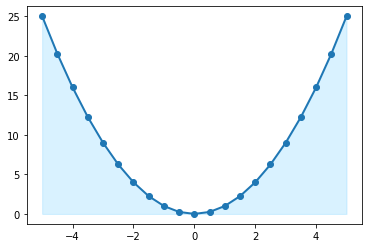

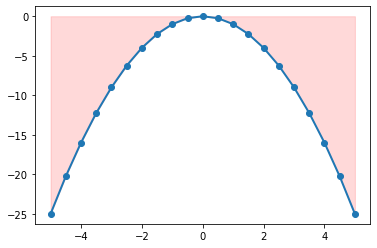

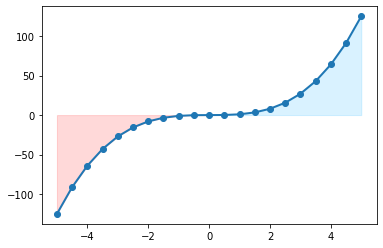

f1. area =  83.33333333333331
f2. area =  -83.33333333333331
f3. area =  0.0


In [ ]:
import numpy as np #np is now a shortcut for numpy
import matplotlib.pyplot as plt #plt is now a shortcut for matplotlib.pyplot
from scipy.integrate import simpson

#Q1
x = np.array([-5.,-4.5,-4.,-3.5,-3.,-2.5,-2.,-1.5,-1.,-0.5,0.,0.5,1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.])
f1 = np.array([25.,20.25,16.,12.25,9.,6.25,4.,2.25,1.,0.25,0.,0.25,1.,2.25,4.,6.25,9.,12.25,16.,20.25,25.])
f2 = np.array([-25.,-20.25,-16.,-12.25,-9.,-6.25,-4.,-2.25,-1.,-0.25,-0.,-0.25,-1.,-2.25,-4.,-6.25,-9.,-12.25,-16.,-20.25,-25.])
f3 = np.array([-125.,-91.125,-64.,-42.875,-27.,-15.625,-8.,-3.375,-1.,-0.125,0.,0.125,1.,3.375,8.,15.625,27.,42.875,64.,91.125,125.])

#Q2
#f1
plt.plot(x, f1, linewidth=2, marker="o")
plt.fill_between(x, f1, alpha=0.15, color='#00aaff') # alpha is a transparency factor (1 = opaque, 0 = fully translucent)
plt.show()

#f2
plt.plot(x, f2, linewidth=2, marker="o")
plt.fill_between(x, f2, alpha=0.15, color='#ff0000') # alpha is a transparaecy factor (1 = opaque, 0 = fully translucent)
plt.show()

#f3
plt.plot(x, f3, linewidth=2, marker="o")
plt.fill_between(x[0:11], f3[0:11], alpha=0.15, color='#ff0000')
plt.fill_between(x[10:21], f3[10:21], alpha=0.15, color='#00aaff')
plt.show()

#Q3
Area = simpson(f1, x=x)
print("f1. area = ",Area) #the sum of the two areas is positive
Area = simpson(f2, x=x)
print("f2. area = ",Area) #the sum of the two areas is negative
Area = simpson(f3, x=x)
print("f3. area = ",Area)  #the sum of the two areas is = 0

<div class="rq">

The three functions are actually numerical representations of:
- $f_1(x) = x^2$, a positive even function
- $f_2(x) = -x^2$, a negative even function
- $f_3(x) = x^3$, an odd function
    
They have been integrated between -5 and +5:

$$A=\int_{-5}^{5}f(x)dx$$

Calculated areas, *A*, are in line with your basic knowledge, aren't they?:
- $A(f_1)$ is positive
- $A(f_2)$ is negative
- $A$ of the odd function $f_3$ is zero.
 
</div>

<div class="intro">

Function area measurements are very important in various spectroscopy techniques, such as Visible-Ultra-Violet (VUV), Nuclear Magnetic Resonance (NMR), chromatography... For example, the area under 1H-NMR peaks is **proportional** to the number of hydrogens which that signal represents. 
    
Even if you are not (yet) familiar with NMR, you must at least know that **equivalent H in a molecule** will give the **same signal** (it is said that they resonate at the same frequency). For example, all H atoms of a methyl group (CH3) will give the same signal. In this way, by integrating the different NMR peaks, information regarding the relative numbers of chemically distinct hydrogens can be found. Actually, the integrated intensities, in conjunction with the positions of the peaks, called chemical shifts, and with the signal splittings (called spin-spin coupling), enable structural assignments. 
</div>
<br>
<div class="app">

The 1H NMR spectrum of propan-1-ol, C3H8O, has been recorded and saved in the `NMR-Propan-1-ol.csv` file that can be found in the `MiscData` folder. The first column contains the x-axis data, *i.e.* the chemical shift (unit = ppm), whereas the second column contains the y-axis data, *i.e.* the intensity of the NMR signal (arbitrary unit).
    
Plot the spectrum, inverting the ppm scale - this is a standard convention in NMR. The commands for inverting the x scale are:

```Python
ax = plt.gca() # this is a way to define advanced plot options
ax.invert_xaxis() # self-explanatory
```
    
</div>

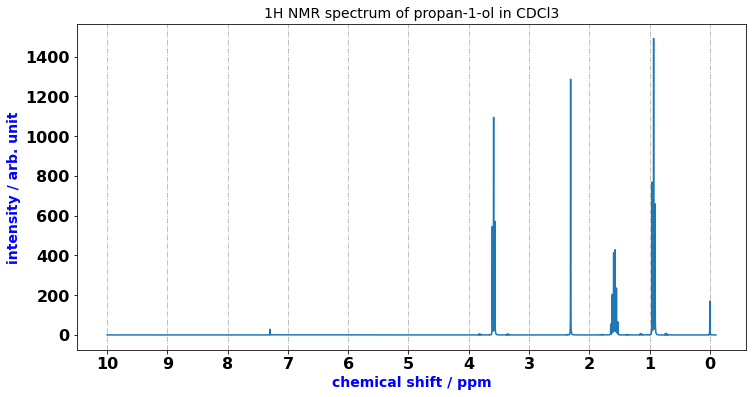

In [ ]:
import numpy as np #np is now a shortcut for numpy
import matplotlib.pyplot as plt #plt is now a shortcut for matplotlib.pyplot

delta, I = np.genfromtxt("./MiscData/NMR-Propan-1-ol.csv", delimiter=";", skip_header=1, unpack=True)

plt.figure(figsize=(12,6))
plt.plot(delta, I)
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.xlabel('chemical shift / ppm',size=14,fontweight='bold',color='blue')
plt.ylabel('intensity / arb. unit',size=14,fontweight='bold',color='blue')
plt.title('1H NMR spectrum of propan-1-ol in CDCl3',size=14)
plt.grid(which='major', axis='x', linestyle='-.') #vertical grid at major ticks. Useful to better see where the peaks are
ax = plt.gca() # this is a way to deefined advanced plot options
ax.invert_xaxis() # self-explanatory
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # sets a tick for every integer multiple of the base (here 1) within the view interval
  
plt.show()

<div class="app">

The previous plot shows that there are four signals, located between:
- [0.85, 1.0] ppm
- [1.45, 1.70] ppm
- [2.25, 2.35] ppm
- [3.5, 3.65] ppm
    
The 0 ppm peak is a reference peak, *i.e.* it is not a peak of the analyzed molecule, and the small peak at 7.2 ppm is an impurity.
    
For each of these four intervals:

**1.** Extract a subset of chemical shifts (delta) and intensities (I).
<br>A **pythonic** way to do that is (i) to identify which part of the `delta` array falls in each range; (ii) to store the corresponding chemical shifts and intensities in intermediate arrays, hereafter named `I_xtr` and `delta_xtr`, and that will be used both for the plot and the integration. This is what we suggest to implement:
    
```Python
# delta is the array that contains chemical shifts in the whole [0-10] ppm range
a = 3.5
b = 3.65
interval = (delta > a) & (delta < b) #returns an array with True values if delta belongs to the [a,b] domain and False otherwise
# a common use for `np.nonzero` is to find the indices of an array where a condition is True
ind = np.nonzero(interval)
#selection of intensities and chemical shifts in the [a,b] range
I_xtr = I[ind]
delta_xtr=delta[ind]
```

<br>

The `nonzero()` method of numPy,
```Python
ind = np.nonzero(table)
```

returns in the `ind` array the indices of the `table` array where a condition is True
<br>
    
**2.** Plot this subset, and use as well the `plt.fill_between` method to highlight the area below the peaks.
    
**3.** Calculate and print the peaks area. The, find out, from these areas, the number of hydrogen atoms that are at the origin of each peak.
</div>

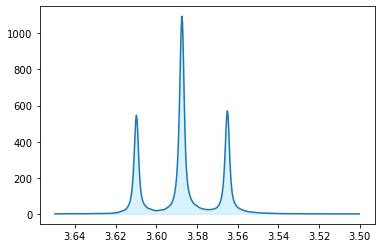

peak(s) area =  8.612727008467587


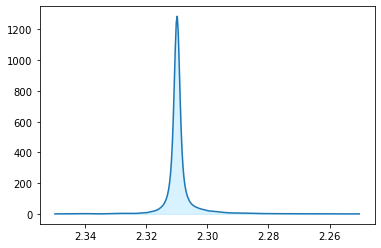

peak(s) area =  4.434464355440707


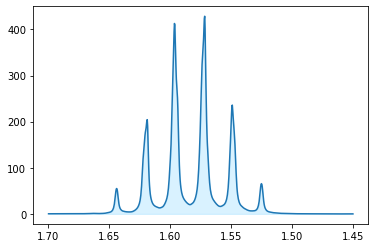

peak(s) area =  8.56588636676551


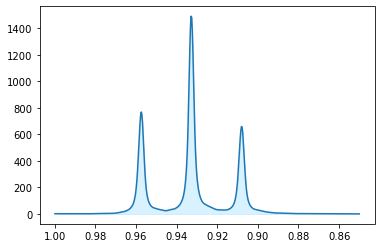

peak(s) area =  12.791438130836596
number of hydrogens =  2.0026968652921435 1.0311354179877779 1.991805122617286 2.9743625941027934
number of hydrogens =  2.0 1.0 2.0 3.0


In [ ]:
from scipy.integrate import simpson

#Q1 and Q2
a = 3.5
b = 3.65
# don't forget that delta is an array that contains chemical shifts in the whole [0-10] ppm range
interval = (delta > a) & (delta < b) #returns an array with True values if delta belongs to the [a,b] domain and False otherwise
# uncomment the next line if you want to see the content of the interval table
#print(interval) 
# a common use for `np.nonzero` is to find the indices of an array where a condition is True
ind = np.nonzero(interval)
# uncomment the next line if you want to see the content of the ind table
# print(ind)
#selection of intensities and chemical shifts in the [a,b] range
I_xtr = I[ind]
delta_xtr=delta[ind]
plt.plot(delta_xtr, I_xtr)
plt.fill_between(delta_xtr, I_xtr, alpha=0.15, color='#00aaff')
ax = plt.gca()
ax.invert_xaxis()
plt.show()
A1 = simpson(I_xtr, x=delta_xtr)
print("peak(s) area = ",A1)

a = 2.25
b = 2.35
interval = (delta > a) & (delta < b)
ind = np.nonzero(interval)
I_xtr = I[ind]
delta_xtr=delta[ind]
plt.plot(delta_xtr, I_xtr)
plt.fill_between(delta_xtr, I_xtr, alpha=0.15, color='#00aaff')
ax = plt.gca()
ax.invert_xaxis()
plt.show()
A2 = simpson(I_xtr, x=delta_xtr)
print("peak(s) area = ",A2)

a = 1.45
b = 1.70
interval = (delta > a) & (delta < b)
ind = np.nonzero(interval)
I_xtr = I[ind]
delta_xtr=delta[ind]
plt.plot(delta_xtr, I_xtr)
plt.fill_between(delta_xtr, I_xtr, alpha=0.15, color='#00aaff')
ax = plt.gca()
ax.invert_xaxis()
plt.show()
A3 = simpson(I_xtr, x=delta_xtr)
print("peak(s) area = ",A3)

a = 0.85
b = 1.0
interval = (delta > a) & (delta < b)
ind = np.nonzero(interval)
I_xtr = I[ind]
delta_xtr=delta[ind]
plt.plot(delta_xtr, I_xtr)
plt.fill_between(delta_xtr, I_xtr, alpha=0.15, color='#00aaff')
ax = plt.gca()
ax.invert_xaxis()
plt.show()
A4 = simpson(I_xtr, x=delta_xtr)
print("peak(s) area = ",A4)

#Q3
nH = 8
sumA = A1 + A2 + A3 + A4
n1 = nH * A1/sumA
n2 = nH * A2/sumA
n3 = nH * A3/sumA
n4 = nH * A4/sumA
print("number of hydrogens = ",n1,n2,n3,n4)
print("number of hydrogens = ",np.round(n1),np.round(n2),np.round(n3),np.round(n4)) #makes it easier to read

<div class="rq">

<span style="color:red">**Do you want to generalize this code?**</span> If you need to analyze an NMR spectrum with many peaks, repeating the same code several times is not the best way to proceed. This will make the notebook difficult to read, and in the end you may make mistakes that are hard to find. Let's develop functions in order to avoid this.
    
If you **don't feel ready** or **don't care to know how to write functions** because the previous copy and paste of similar code parts suits you, you can safely skip the next Python cell &#x1F447;, up to the [*Derivatives* sub-section](#derivatives). But try to come back one day! &#x1F468;&#x200D;&#x1F4BB; &#x1F469;&#x200D;&#x1F4BB;
</div>

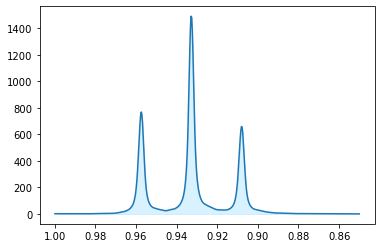

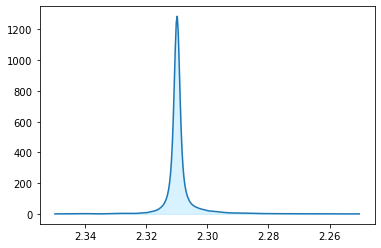

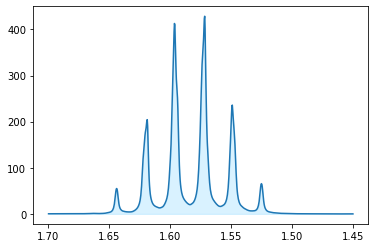

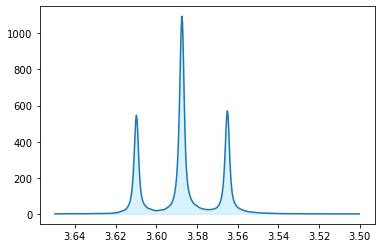

[0.85-1.00] ppm --> 3.0 H
[2.25-2.35] ppm --> 1.0 H
[1.45-1.70] ppm --> 2.0 H
[3.50-3.65] ppm --> 2.0 H


In [ ]:
def zoomNMR(limits,delta,I,plot=True):
    """
    plots a 1D NMR spectrum zoomed-in between limits and calculates the area in this interval, using the simpson method of scipy.integrate
    input:
        - limits = numpy array with the two limits of integration/zoom
        - delta = a numpy array with chemical shifts
        - I = a numpy array with the corresponding intensites: I = f(delta)
        - plot = boolean (default:True)
    returns:
        the area below the I = f(delta) in the limits[0]-limits[1] interval
        i.e. integral(I)dI between limits[0] and limits[1]
    plots:
        a spectrum zoomed in the limits[0]-limits[1] domain if the plot variable is set to True
    """
    from scipy.integrate import simpson
    interval = (delta > limits[0]) & (delta < limits[1])
    ind = np.nonzero(interval)
    I_zoom = I[ind]
    delta_zoom=delta[ind]
    if (plot):
        plt.plot(delta_zoom, I_zoom)
        plt.fill_between(delta_zoom, I_zoom, alpha=0.15, color='#00aaff')
        ax = plt.gca()
        ax.invert_xaxis()
        plt.show()
    A = simpson(I_zoom, x=delta_zoom)
    return A

def Calc_nXperMultiplet(nXtot,nMultiplets,AMultiplets):
    """
    calculates the number of nuclei X for all NMR signals
    input:
        - nXtot = total number of nuclei (eg number of protons)
        - nMultiplets = total number of peaks
        - AMultiplets = numpy table with the area for each NMR peak (expecting nMultiplets values)
    returns:
        a numpy array that contains the number of nuclei X for each peak
    """
    sumA = 0.
    n = np.zeros(nMultiplets) #create a numpy array with nMultiplets zeros
    for i in range(nMultiplets):
        sumA += AMultiplets[i]
    for i in range(nMultiplets):
        n[i] = nXtot * AMultiplets[i]/sumA
    return n
    
nMultiplets = 4
limits=np.array([[0.85,1.0],
                 [2.25,2.35],
                 [1.45,1.70],
                 [3.5,3.65]
                 ])
# on the contrary to lists, an array cannot be increased with new items. It must first be initialized with the appropriate size 
# the A array is initialized with zeros
A=np.zeros(nMultiplets)

nH = 8
for i in range(nMultiplets):
    A[i] = zoomNMR(limits[i],delta,I,True)

n = Calc_nXperMultiplet(nH, nMultiplets, A)

for i in range(nMultiplets):
    print(f"[{limits[i][0]:.2f}-{limits[i][1]:.2f}] ppm --> {n[i]:.1f} H")

### <a name="derivatives"></a>Derivatives

<div class="intro">

Let's now move to thermodynamics, and more specifically to two thermodynamic properties: the enthalpy, $H$, and the heat capacity at constant pressure, $C_P$. The enthalpy value of a chemical system is determined entirely by the temperature, pressure, and composition of this system. $H$ has the dimensions of **energy**.

If we consider a constant pressure process, it can be shown that the first derivative of *H* with respect to temperature is nothing else but $C_P$:

$$C_{P}(T)=\left(\frac{\partial H}{\partial T}\right)_{P}$$

$C_P(T)$ is actually the amount of heat to be supplied to an object to produce a unit change in its temperature *T*. It is usually expressed as Joules per Kelvin in terms of the actual amount of material being considered, most commonly a mole.

</div>
<br>
<div class="app">

In the next cell, we will:
    
**1.** load with `np.genfromtxt` *H* values experimentally found for copper (Cu) under *P* = 1 bar, at various temperatures (first column = *T* in K, second column = *H* in kJ․mol$^{-1}$)

**2.** plot *H* as a function of *T*. It will give the opportunity to annotate specific parts on the graph

**3.** convert *H* in J․mol$^{-1}$, before the calculation of $C_P$ as $\left(\frac{\partial H}{\partial T}\right)_{P}$
    
</div>

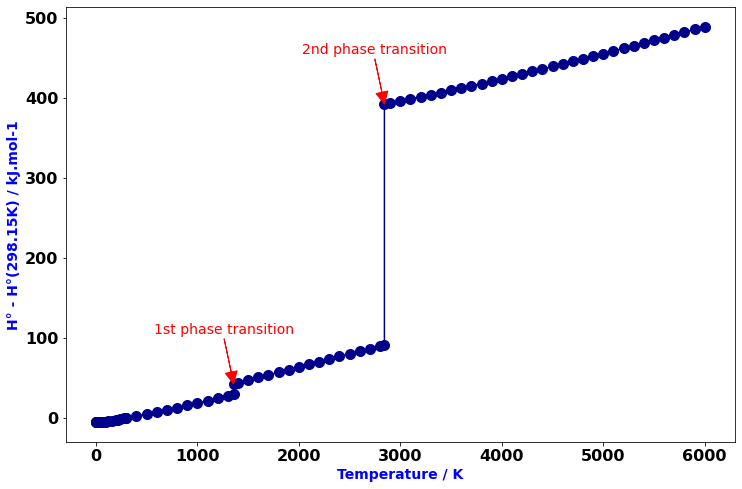

In [ ]:
T,H = np.genfromtxt("./MiscData/H0-Cu.csv", delimiter="\t", skip_header=1, unpack=True)
#T and H are numpy arrays
# uncomment the next two lines if you want to check the content of T and H
#print("Temperature = ",T)
#print("Enthalpy = ",H)

plt.figure(figsize=(12,8))
plt.plot(T, H, color='darkblue', linestyle='-', marker="o",markersize=10)
plt.xlabel('Temperature / K',size=14,fontweight='bold',color='blue')
plt.ylabel('H° - H°(298.15K) / kJ.mol-1',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

#annotation on th graph of the phase transitions
#play a bit with the xoff and yoff values to see what happens
xoff = -10
yoff = 50
plt.annotate("1st phase transition", ha='center', xy=(1358,42.798), xytext=(xoff, yoff), textcoords='offset points',fontsize=14,color='r',arrowprops=dict(color='red', width=0.1))
plt.annotate("2nd phase transition", ha='center', xy=(2843.261,392.257), xytext=(xoff, yoff), textcoords='offset points',fontsize=14,color='r',arrowprops=dict(color='red', width=0.1))

plt.show()

<div class="rq">

**There are two very interesting features at ∼1350 K and ∼2850 K**: a sudden increase of *H*. This pattern is characteristic of **phase transitions** (e.g. solid ↔ liquid or liquid ↔ gas). During these transitions very large changes in the value of the enthalpy for a substance occur without any noticeable change in temperature.
    
Two phase transitions occur in this temperature domain:
- a fusion of solid Cu at $T_\mathrm{fus}$ = 1358 K (*i.e.* a phase transition solid ↔ liquid)
- a vaporization of liquid Cu at $T_\mathrm{vap}$ = 2843.2 K (*i.e.* a phase transition liquid ↔ gas)
    
</div>
<br>
<div class="intro">
    
We are now going to calculate $C_p$ as the firt derivative of *H* with respect to *T*. Yet, we do not have a function $H(T)$, but values of *H* measured for different temperatures. So we have to numerically calculate the first derivative. The simplest way to do that is by calculating for each temperature $T_i$:

$$C_p(T_i) = H'(T_{i}) = \frac{\Delta H}{\Delta T} = \frac{H(T_{i+1})-H(T_{i})}{T_{i+1}-T_{i}}$$

The `gradient(y,x)` function of `NumPy` can do such calculation, using a more accurate formulation. In practice, it returns the first derivative at each point of an array y, which values are located at the positions contained in the x array.
</div>
<br>
<div class="app">

In the next cell, we are going to:

**1.** calculate $C_P$ as the derivative of *H* with respect to *T*, using `np.gradient`

**2.** plot $C_P$ as a function of *T*
</div>
<br>
<div class="rq">

But first of all, a gentle mathematical reminder... The plot of $H(T)$ shows two discontinuities of the curve at each phase transition. Given the genuine definition of the first derivative, *i.e.*:

$$f'(a)=\lim_{h\rightarrow0}\frac{f(a+h)-f(x)}{h}$$

and given as well what you know about derivatives, what is the expected value of $C_P$ at phase transitions?...    

$C_{P}\rightarrow+\infty$ !! (since *h* = 0 either at $T_\mathrm{fus}$ and $T_\mathrm{vap}$)
    
In other words, if *f* is differentiable at *a*, then *f* must also be **continuous** at *a*
    
This why a very large numerical value is found for $C_P$ at $T_\mathrm{fus}$ and $T_\mathrm{vap}$. It involves to set the limits of the y axis (see code below).

</div>

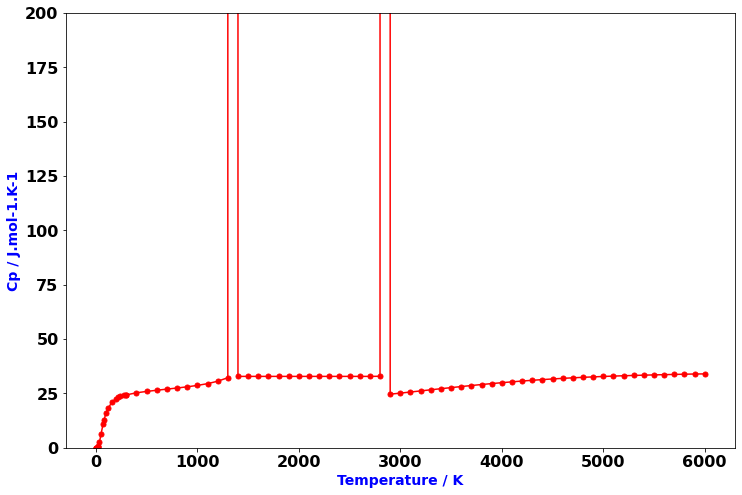

In [ ]:
T,H = np.genfromtxt("./MiscData/H0-Cu.csv", delimiter="\t", skip_header=1, unpack=True)
# conversion of H to J.mol-1
H *= 1000.

# first calculate Cp as the gradient of H with respect to T
Cp = np.gradient(H, T)

# now plot Cp as a function of T
plt.figure(figsize=(12,8))
plt.plot(T, Cp, color='r', linestyle='-', marker="o",markersize=5)
plt.xlabel('Temperature / K',size=14,fontweight='bold',color='blue')
plt.ylabel('Cp / J.mol-1.K-1',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
#set the limits of the y axis due to the high Cp values
plt.ylim(0,200)

## Advanced control using conditional branching and looping structures

### Loops

<div class="intro">

In computer programming, loops are used to repeat a block of code. The `for` loop is used to run a block of code for a certain number of times. It is used to iterate over any sequences such as lists, range of numbers,.. The simplest way to figure out how it works is to run the blocks of codes below:
</div>

In [ ]:
superheroes = ["Superman", "Homelander", "Silver Surfer", "Batman"]
for i in superheroes:
    print(i)
    print("-- End of the list ?? --") #this print command belongs to the indented block => it's part of the loop

Superman
-- End of the list ?? --
Homelander
-- End of the list ?? --
Silver Surfer
-- End of the list ?? --
Batman
-- End of the list ?? --


In [ ]:
superheroes = ["Superman", "Homelander", "Silver Surfer", "Batman"]
for i in superheroes:
    print(i)
print("-- End of the list !! --") #this print command does not belong to the indented block => it's outside the loop

Superman
Homelander
Silver Surfer
Batman
-- End of the list !! --


<div class="rq">

The `print(i)` command must belong to an **indented block**, consisting in this case of one statement. The indentation tells Python which statements are in the loop, and which are outside the loop.
</div>

<div class="app">

We want to annotate all the points on the graph with the name of the electrode, using a built-in `annotate` function of `matplotlib.pyplot` (aka `plt`) that takes the text, and then the x and y coordinates of the point.
    
A `VolcanoPlot-wA.csv` file, contained in the `MiscData/` folder differs from the previoulsy loaded `VolcanoPlot-woA.csv` file by a third column that contains the chemical composition of the electrode:

<img src="MiscData/VolcanoPlot-SpreadSheet-wA.png" style="margin-left:auto; margin-right:auto; display: block; width:300px" id="img_VolcanoPlotData2" alt="Volcano plot data for the hydrogen reaction"/>
    
**1.** Read this file with `np.genfromtxt`. 

**2.** Then plot again $\log(i_0)$ as a function of $\Delta_\mathrm{ads}G$ and smooth the function

**3.** Finally annotate each point by the corresponding chemical composition of the electrode. Mind that `np.annotate` cannot receive arrrays as arguments. Use a loop to annotate all points.
</div>

In [ ]:
import numpy as np #np is now a shortcut for numpy
import matplotlib.pyplot as plt #plt is now a shortcut for matplotlib.pyplot

# np.genfromtxt can be a pain in the ass when you have to read both floats and text
# the most reliable way is to explicitly define each column type, namely float, float and '|U10'
# '|U10'??? yes, as unicode 10-character string. Well, never mind, just copy/paste
# And if the width of the text column increases 10 caracters, increase '|U10' to the appropriate '|Un' statement
DG, logi0, electrode = np.genfromtxt("./MiscData/VolcanoPlot-wA.csv", delimiter=";", skip_header=1, dtype=(float,float,'|U10'), unpack=True)
# that was the tricky part, now it's easy
print("DeltaG = ",DG)
print("log(i0) = ",logi0)
print("electrode = ",electrode)

DeltaG =  [-12.876146   -8.5595008  -9.9983824  -6.3089424  -6.272048   -7.4526688
  -3.3573904  -2.3243472  -2.1029808   0.6272048   1.8816144   4.3904336
  10.441115   11.806208   17.008318 ]
log(i0) =  [-6.5492228 -6.7668394 -5.7029361 -5.1830743 -4.9775475 -2.8013817
 -2.91019   -3.4784111 -2.5958549 -3.611399  -4.9654577 -5.2314335
 -6.3316062 -7.5889465 -7.4075993]
electrode =  ['Nb' 'Mo' 'W' 'Co' 'Ni' 'Re' 'Pd' 'Rh' 'Pt' 'Ir' 'MoS2' 'Cu' 'Au(111)'
 'Ag' 'Bi']


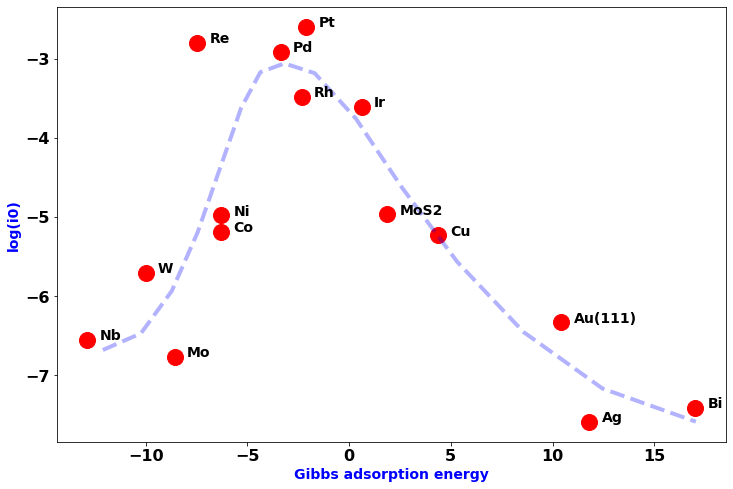

In [ ]:
from scipy.signal import savgol_filter
DGhat, logi0hat = savgol_filter((DG,logi0), 11, 3)

plt.figure(figsize=(12,8))
plt.plot(DG, logi0, color='r', linestyle='', marker="o",markersize=16)
plt.plot(DGhat, logi0hat, color='b', linestyle='--', linewidth=4, alpha=0.3) #alpha is the degree of transparency of the graph (opaque -> alpha = 1, fully translucent -> alpha = 0)
plt.xlabel('Gibbs adsorption energy',size=14,fontweight='bold',color='blue')
plt.ylabel('log(i0)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

# annotation
for i in range(len(electrode)):
    plt.annotate(electrode[i], xy=(DG[i]+0.6,logi0[i]),fontsize=14,fontweight='bold')

plt.savefig('./FiguresCreatedInNotebooks/fig2-Pyt4PC.png',dpi=300,transparent=True)
plt.show()


<div class="rq">

The identification of the best electrocatalytic electrodes for the production of molecular hydrogen is now straightforward... provided of course that you know how to analyze such volcano plots: it is pure platinum or palladium electrodes, because they lie on top of the volcano. &#x1F60E;
</div>

### Conditional branching and interactive script with `input()`

<div class="intro">
 
Conditional branching is the term used to describe the set of operations such as `if <condition> do <something> else do <something else>`

Let's start simple. It also gives the opportunity to introduce the `input` command, that takes input from the user and returns it *as a string*:
</div>

In [ ]:
#The input() function reads a line from the input and converts it into a string
a = input("Please give a number")
# conversion of the input into a float using the float() function
a = float(a)
if a >= 0:
    print("the input value is >= zero") # this print command belongs to the "do <something>"" indented block
                                        # it will be ran if the a >= 0 condition returns True
else:
    print("the input value is < zero") #this print command belongs to the "do <something else>" indented block
                                       # it will be ran if the a >= 0 condition returns False

Please give a number 1


the input value is >= zero


<div class="intro">
 
There are often choices programs have to make that are not simply `True` or `False`. For situations in which there are three or more choices, there is the `elif` keyword, which is an abbreviation for else, if:
</div>

In [ ]:
#the string can directly be imported an a float
a = float(input("Please give a number"))
if a > 0:
    print("the input value is > zero")
elif a == 0: # it's an == operator that compares the value or equality of two objects
    print("the input value is = zero")
else:
    print("the input value is < zero")

Please give a number 0


the input value is = zero


## A word about object-oriented programming (OOP) in Python

<div class="intro">

The next short Python script illustrates the practical consequence of **object-oriented programming** (**OOP**) in Python. Let's consider a NumPy array, named `dummy`. Since it is declared as `dummy = np.array([items])`, it is a **NumPy object**. It is actually NumPy’s main object. As such, all methods (or functions) defined in the NumPy library apply to this `dummy` object.
    
NumPy provides several methods, among them the calculation of the mean value of an array (`mean()`), its maximum (`max()`) and minimum (`min()`) value. As you can see in the next cell, you can use them either by calling:
- `np.function(dummy)` → It is quite straightforward to understand this statement: the `np.function()` is applied to the `dummy` argument
- `dummy.function()` → This second statement is directly related to OOP: `dummy` being a `numpy` object, `dummy.function()` is the so-called **dot notation** that also involves that the `function()` method is applied to the `dummy` object. 

Both notations yield the same results... hopefully :-):
</div>

In [ ]:
import numpy as np #np is now a shortcut for numpy

dummy = np.array([-20, -10, -5, -3, -2, -1, -0.1, 0, 0.1, 1, 2, 3, 5, 10, 20])
print("mean = ",np.mean(dummy), "max = ", np.max(dummy), "min = ", np.min(dummy))
print("mean = ",dummy.mean(), "max = ", dummy.max(), "min = ", dummy.min())

mean =  0.0 max =  20.0 min =  -20.0
mean =  0.0 max =  20.0 min =  -20.0


<div class="rq">

**Don't forget, in the dot notation, the () after the name of the function (or method)**. Otherwise, the Python interpreter will assume that you are calling a variable (a so-called *instance attribute* or *class attribute*) associated to the `dummy` object. For example, `dummy.size` returns the number of elements of the `dummy` array.
</div>

In [ ]:
print("Test 1. Number of elements of the dummy array = ",dummy.size)

Test 1. Number of elements of the dummy array =  15


In [ ]:
print("Test 2. Number of elements of the dummy array = ",dummy.size())

TypeError: 'int' object is not callable

<div class="rq">

The second statement (Test 2) returned an error, saying about `dummy.size()` that the `'int' object is not callable`:
```Python
TypeError                                 Traceback (most recent call last)
Input In [56], in <cell line: 1>()
----> 1 print("Test 2. Number of elements of the dummy array = ",==dummy.size()==)

TypeError: 'int' object is not callable
```
    
It's because since `size` returns an integer number, `size()` means that you try to call an integer value as a function, which makes no sense.
    
**<span style="color:red">FAQ</span>: &#x1F64B; "<i>It seems a little bit complicated. <span style="color:red">Can I skip this part?</span></i>"** 

At the beginning, why not. But understanding this kind of behavior will save you a lot of trouble when you develop your applications in Python, even simple ones. Don't waste too much time trying to Google the origin of the errors generated by your codes. **Understanding this very important "OOP stuff" will save you a lot of time.** We will also see in the same notebook that this OOP approach allows the fine tuning of plots.

And if you want to develop advanced applications, it is a must. And a valuable skill on the labor market.
</div>

<div class="rq">

<span style="color:red">**Do you want to know more?**</span> Let's develop a simple application. If you don't feel comfortable, jump to the *[Python fancy plotting](#pfp)* section &#x1F447; and come back later.
</div>
<br>
<div class="app">

We will now define a class named [`square`](https://en.wikipedia.org/wiki/Square). 

**1.** Define as **class attributes** (or class variables) all properties inherited by any square
- "regular quadrilateral" species string variable
- logical variable to specify that a square is a regular polygon
- "number of sides" integer variable
- "internal and central angles" (in Degrees) float variables

**2.** Every new square object will be defined by its side length variable, *i.e.* it must be a so-called **instance attribute**
    
**3.** Implement several **class methods** (or class functions) that can be applied to square objects:
- perimeter()
- area()
- circumradius()
- inscribed circle radius()
</div>

In [ ]:
#Question 1
class square:
    # class attributes are class variables that are inherited by every object of a class. The value of class attributes remain the same for every new object
    species = "regular quadrilateral"
    RegPolygon = True
    nsides = 4
    InternalAngle= 360.0/nsides # class variables can also be defined by simple operations
    CentralAngle = InternalAngle

#Question 2
    #  instance attributes, which are defined in the __init__() function, are class variables that allow us to define different values for each object of a class
    def __init__(self, sidelength): #self stands for square,and it is used to access variables that belongs to the class
        self.sidelength = sidelength

#Question 3
    # class Methods: you can define as many methods as you want in a class using the def keyword.
    # Each method must have the first parameter, generally named as self, which refers to the calling instance
    def perimeter(self):
        """returns the perimeter of a square as a function of the side length"""
        return self.nsides*self.sidelength;
    def area(self):
        """returns the area of a square as a function of the side length"""
        return self.sidelength**2
    def cradius(self):
        """returns the circumradius of a square as a function of the side length"""
        return self.sidelength*np.sqrt(2)/2
    def iradius(self):
        """returns the radius of the circle inscribed in the square as a function of the side length"""
        return self.sidelength/2

<div class="app">


**4.** Now, use the square class:

- define a new square, with a side length of 4
- check that the side length instance attribute is 4, indeed
- print the class attributes: species, regular polygon, number of sides, internal angle, central angle
- print its perimeter, calculated either through the dot notation or the method(instance attribute) notation
- print the three other properties,calculated through dot notation 
</div>

In [ ]:
#Question 4
square1 = square(4) #we create an instance of our square class to create a square1 object. Given the __init__ definition of the class, 2 is the length instance attribute

print("instance attribute")
print("side length = ",square1.sidelength, "unit of length") # checking instance attribute through dot notation

print()
print("class attributes")
print("Species = ",square1.species) # checking class attribute through dot notation
print("Regular polygon = ",square1.RegPolygon) # checking class attribute through dot notation
print("Number of sides = ",square1.nsides) # checking class attribute through dot notation
print("Internal angle = ",square1.InternalAngle,"°") # checking class attribute through dot notation
print("Central angle = ",square1.CentralAngle,"°") # checking class attribute through dot notation

print()
print("perimeter function")
#accessing the perimeter method through dot notation and through method(instance attribute) notation
print("Perimeter = ",square1.perimeter(), "units of length") 
print("Perimeter = ",square.perimeter(square1), "units of length")

print()
print("other functions")
#accessing other properties through dot notation 
print("Area = ",square1.area(), "(units of length)^2") 
print("Circumradius = ",square1.cradius(), "units of length") 
print("Radius of the inner circle = ",square1.iradius(), "units of length") 

instance attribute
side length =  4 unit of length

class attributes
Species =  regular quadrilateral
Regular polygon =  True
Number of sides =  4
Internal angle =  90.0 °
Central angle =  90.0 °

perimeter function
Perimeter =  16 units of length
Perimeter =  16 units of length

other functions
Area =  16 (units of length)^2
Circumradius =  2.8284271247461903 units of length
Radius of the inner circle =  2.0 units of length


## <a name="pfp"></a>Python fancy plotting: object-oriented approach and animated plots

### Object-oriented approach

<div class="intro"
     
While it is easy to quickly generate plots with the `matplotlib.pyplot` module, the use of **object-oriented approach** is recommended as it gives **more control and customization** of your plots. The main idea behind using the more formal object-oriented method is to create figure and axes objects and then just call methods or attributes from these objects.

Each plot that we see in a figure, is an `axes` object. The `axes` object holds the actual data that we are going to display. It will also contain X- and Y-axis labels, a title.

Don't make a confusion between `axes` and `axis` objects. `axis` objects set the data limits. They also contain the ticks and ticks labels. They belong to an `axes` object.
</div>

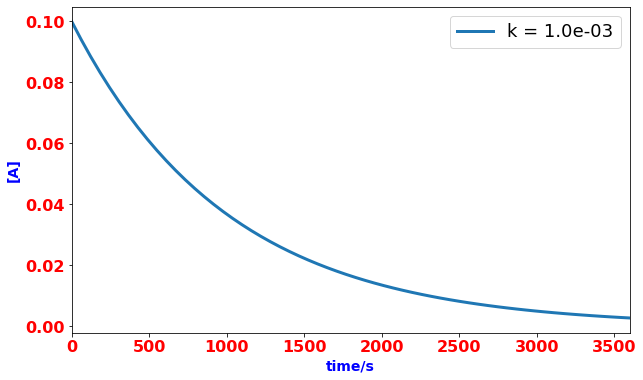

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 6)) #new fig and axes instances
tmin = 0.
tmax = 3600.
t = np.linspace(tmin,tmax,60)

def CA(k, CA0, t):
    return CA0*np.exp(-k*t)

CA0 = 0.1 #mol.L-1
k = 1e-3

axes.set_xlim(tmin,tmax)
axes.set_xlabel("time/s",size=14,weight='bold',color='b')
axes.set_ylabel("[A]",size=14,weight='bold',color='b')
axes.tick_params(axis='both', labelsize=16,labelcolor='red') # powerful command, but it does not provide a fontweight option
for tick in axes.xaxis.get_majorticklabels(): tick.set_fontweight('bold') #it is both powerful (you can specify the type of a specific tick) and annoying
for tick in axes.yaxis.get_majorticklabels(): tick.set_fontweight('bold')

axes.plot(t,CA(k,CA0,t),label=f"k = {k:.1e}",linewidth=3)

axes.legend(loc = 'best', fontsize=18)
plt.show()

### Animated plots

<div class="intro">

Now that you are an advanced python programmer &#x1F4AA;, try to analyze the next piece of code for yourself. But first, let's provide some context.

The intent is to draw an animated plot of an exponential decay $C(t)$ of the type
    
$$C(t) = C_0 \exp(-kt)$$

where:
- $C(t)$ is the quantity at time *t*
- *t* is the time 
- $C_0$ is the initial quantity, *i.e.* $C(t=0)$
- *k* is the exponential decay constant of this process.

You will see one day, if not already learned, that this equation is the so-called integrated form of the rate law for a first-order chemical reaction R &rarr; P. $C_0$ is the initial concentration of reactant R, *k* is the rate constant of this reaction, and $C(t)$ is the concentration of R at time *t*.
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
tmin = 0.
tmax = 3600.
t = np.linspace(tmin,tmax,60)

def C(k, C0, t):
    return C0*np.exp(-k*t)

C0 = 0.1 #mol.L-1
k = np.linspace(1e-4,1e-2,30)

fig, axes = plt.subplots(figsize=(10, 6)) 

def func(i):
    axes.clear()
    axes.set_xlim(tmin,tmax)
    axes.set_xlabel("time/s",size=14,weight='bold',color='b')
    axes.set_ylabel("C(t)",size=14,weight='bold',color='b')
    axes.tick_params(axis='both', labelsize=16,labelcolor='red') # powerful command, but it does not provide a fontweight option
    for tick in axes.xaxis.get_majorticklabels(): tick.set_fontweight('bold') #it is both powerful (you can specify the type of a specific tick) and annoying
    for tick in axes.yaxis.get_majorticklabels(): tick.set_fontweight('bold')
    axes.plot(t,C(k[i],C0,t),label=f"k = {k[i]:.1e}",linewidth=3)
    axes.legend(loc = 'best', fontsize=18)
    return

from IPython.display import HTML, display
ani = FuncAnimation(fig, func, fargs=(), interval=100, frames=np.size(k))
plt.close(fig=fig) #very important (don't ask why...)
display(HTML(ani.to_jshtml()))

<div class="rq">

As you can see, the higher *k* is, the faster the decrease in *C*, *i.e.* the reactant R is transformed more and more rapidly into the product of the reaction, P.
</div>

## Final words

<div class="rq">

Let's cite Bravenec and Ward [1]: "*Programming in Python empowers scientists to apply their knowledge to scales beyond what can be accomplished with manual effort. Whether automating operations for large volumes of data, solving numerical problems, or creating simulations, there's a wealth of applications out there. **We've only just scratched the surface**.*" **One cannot but agree.** &#x1F642;

**<span style="color:red">Going deeper into the fantastic and vast capabilities of python and its libraries is the goal of this open course.</span>** &#x1F973;
</div>

## Bibliography

[1] A. D. Bravenec & K. D. Ward (**2022**). Interactive Python Notebooks for Physical Chemistry, *J. Chem. Ed.* xx:xx-xx, [10.1021/acs.jchemed.2c00665](https://doi.org/10.1021/acs.jchemed.2c00665)

In [62]:
vID.end(cwd0)

**End at:** Monday 20 February 2023, 13:52:35  
**Duration:** 00:01:12 663ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>